# Lab 5: Pandas and Principle Component Analysis

Notes:

1. Normalize
2. Covariance matrix


In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [9,9]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2
%matplotlib notebook

 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url: "https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv".
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, in one method call get the shape and print the results.
2. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to get the column headers and print them.
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, in one method call get the first 5 items and print the results.
2. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation, find the mean of each column
    1. Are there any columns that pandas did not calculate the mean for?  Why?
3. Use [Dataframe.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) to replace the values in the diagnosis column with integers values.
    1. Create and use a dictionary of the current values and what they should be replaced by.
    2. "M" should be replaced with 1 and "B" should be replaced with 0.
    2. Use the inplace parameter to replace the values in the dataframe.
    4. Print the first 5 items of the updated dataframe's diagnosis column to make sure that the replace worked correctly
4. Create a cancer_x dataframe which includes all the columns except for "id", "diagnosis" and "Unnamed"
4. Update cancer_x to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 

In [2]:
# df = pd.read_csv('data.csv')
df = pd.read_csv('http://cs.colby.edu/hewolfe/data.csv')
print(f'The shape of df is {df.shape}')

The shape of df is (569, 33)


In [3]:
print(f'The column headers of df are {df.columns}')

The column headers of df are Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
print(df.head(5))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
print(df.mean(axis=0))

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


5A: The last column with the variable name "Unnamed:32", because all the data in that column is NaN.

In [6]:
df.replace(to_replace={'M':1, 'B':0}, inplace = True)
print(df.head(5))

cancer_x = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'], axis=1)

rg = cancer_x.max(axis=0)-cancer_x.min(axis=0)
cancer_x = (cancer_x - cancer_x.min(axis=0))/rg

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoo

## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. rotating the text using setp
        2. adjusting the margins with subplots_adjust
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the cmap parameter for imshow
        2. Switch the direction by appending \_r to the end of the colormap name
    4. Include the colorbar.
3. What interpretations can you draw from this covariance matrix?

(30, 30)


<IPython.core.display.Javascript object>


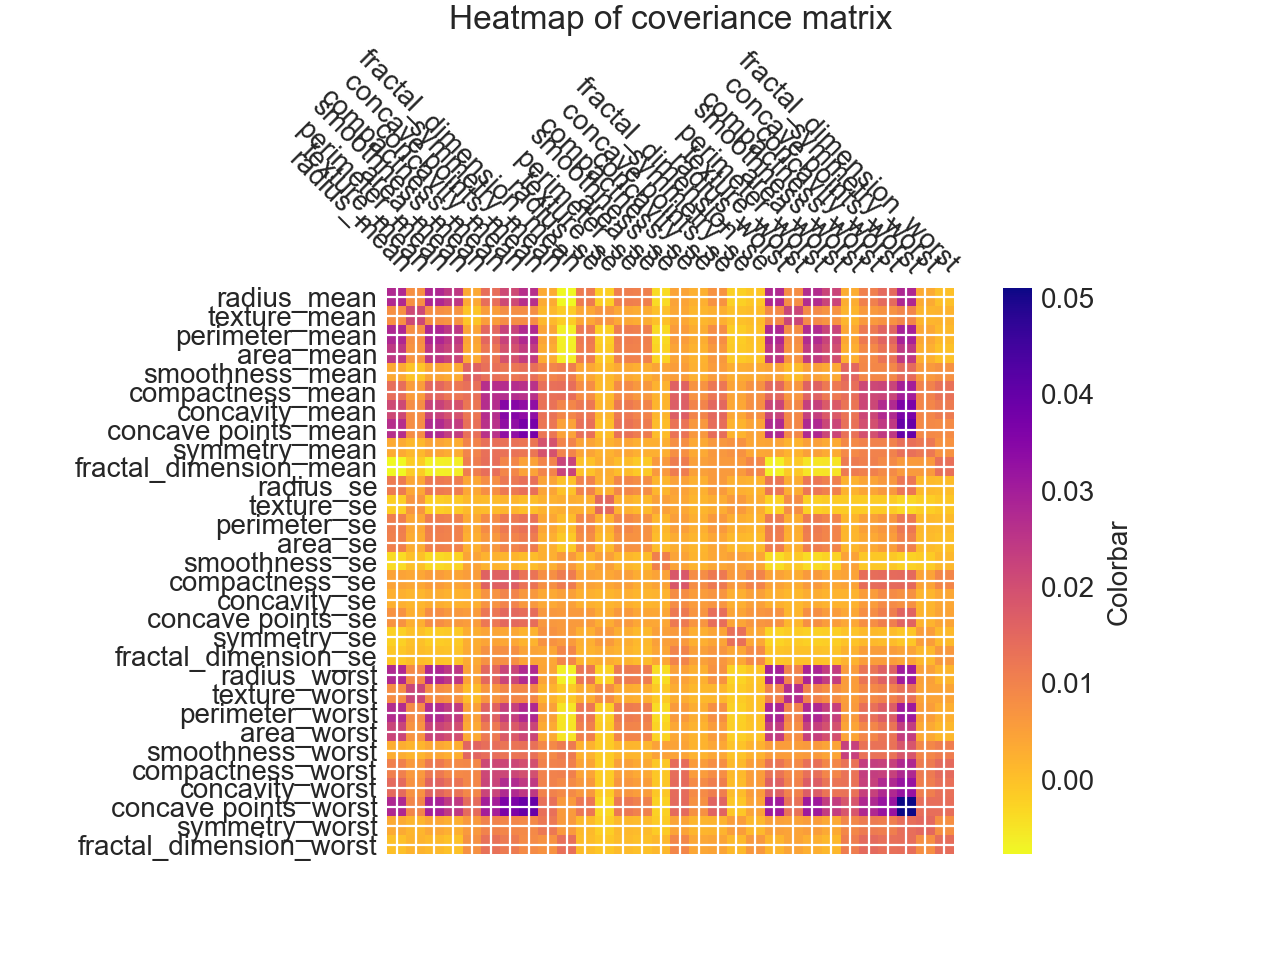

Expected Covariance matrix shape: (30, 30)


In [7]:
cov = cancer_x.cov()
print(cov.shape)
# print(cov)

fig, ax = plt.subplots()

ax.set_title('Heatmap of coveriance matrix')

# We want to show all ticks...
ax.set_xticks(np.arange(cov.shape[0]))
ax.set_yticks(np.arange(cov.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(cov.columns)
ax.set_yticklabels(cov.index)

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False,
                labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor")

plt.subplots_adjust(top = 0.7)

hmap = ax.imshow(cov, cmap='plasma_r')

cbar = fig.colorbar(hmap)
cbar.ax.set_ylabel("Colorbar")

plt.show()

print("Expected Covariance matrix shape: (30, 30)")

## Task 3: Principle Component Analysis

1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  Print the eigen_vectors shape and eigen_values.
2. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.
2. Graph a scatterplot of the transformed data using plt.scatter
    1. Scatter Parameters
        1. Graph the first principle component on the x axis (first column of the tranformed data)
        2. Graph the second principle component on the y axis (second column of the tranformed data)
        3. Use the 'diagnosis' column of your data for the color with a black edgecolor
        4. Use the same cmap from the covariance matrix
    3. Have a title, and axis labels.
    4. Add a custom [legend](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html) using legend_elements. 
        1. Get the handles and labels from legend_elements
        2. Update the labels 0 to 'Benign' and 1 to 'Malignant'
        1. Create a legend with the handles, new labels and a title and place it in the upper right corner.

Shape of eigenvectors is (30, 30)
[0.33133 0.10785 0.04439 0.04001 0.0255  0.01917 0.00986 0.00743 0.00617
 0.0059  0.0053  0.00473 0.0041  0.00296 0.00168 0.00161 0.00115 0.00094
 0.00086 0.00066 0.00061 0.00049 0.      0.00002 0.00003 0.00012 0.00021
 0.00027 0.00032 0.00033]
          0         1
0 -2.590770  0.762974
1 -1.666057 -0.220868
2 -2.158371  0.226378
3 -2.204565  1.861168
4 -1.830577  0.033608


<IPython.core.display.Javascript object>


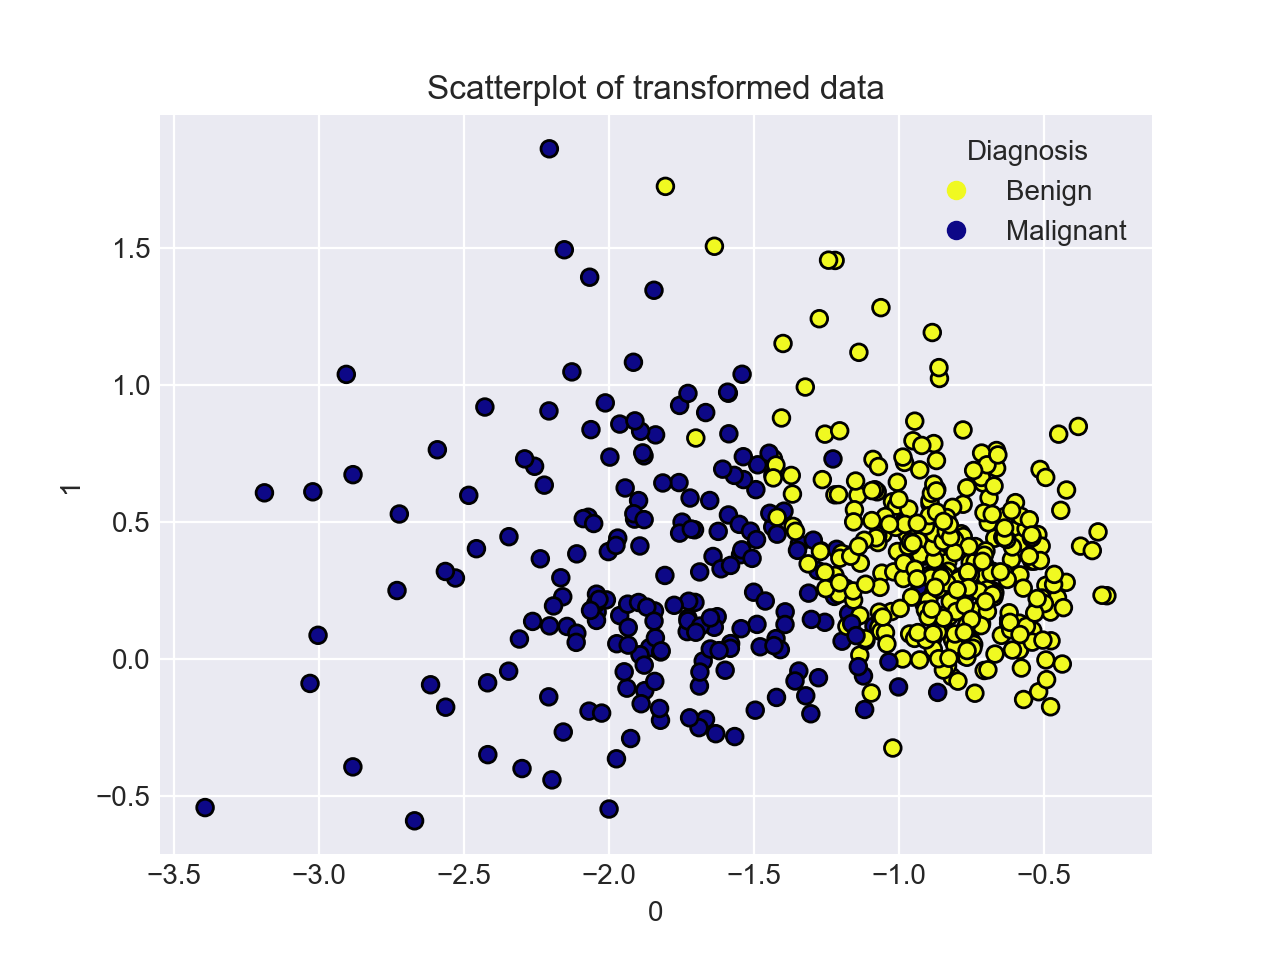

Expected Eigen values:
[0.33133 0.10785 0.04439 0.04001 0.0255  0.01917 0.00986 0.00743 0.00617 0.0059  0.0053  0.00473 0.0041  0.00296 0.00168 0.00161 0.00115 0.00094 0.00086 0.00066 0.00061 0.00049 0.      0.00002 0.00003 0.00012 0.00021 0.00027 0.00032 0.00033]
Expected Eigen vectors shape:
(30, 30)
Expected Transformed data:
           0         1
0 -2.590770  0.762974
1 -1.666057 -0.220868
2 -2.158371  0.226378
3 -2.204565  1.861168
4 -1.830577  0.033608


In [8]:
w, v = np.linalg.eig(cov)
print(f'Shape of eigenvectors is {v.shape}')
print(w)

t = cancer_x @ v[:, :2]
print(t.head(5))

fig, ax = plt.subplots()

scatter = ax.scatter(t[0], t[1], c=df['diagnosis'], cmap='plasma_r', edgecolors='black')
ax.set_title('Scatterplot of transformed data')
ax.set_xlabel('0')
ax.set_ylabel('1')

# # produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="upper left", title="Classes")

handles, labels = scatter.legend_elements(prop='colors')
labels = ['Benign', 'Malignant']
legend1 = ax.legend(handles, labels, loc="upper right", title="Diagnosis")

plt.show()

# plt.legend_elements()

print ("Expected Eigen values:\n[0.33133 0.10785 0.04439 0.04001 0.0255  0.01917 0.00986 0.00743 0.00617 0.0059  0.0053  0.00473 0.0041  0.00296 0.00168 0.00161 0.00115 0.00094 0.00086 0.00066 0.00061 0.00049 0.      0.00002 0.00003 0.00012 0.00021 0.00027 0.00032 0.00033]")
print ("Expected Eigen vectors shape:\n(30, 30)")
print('''Expected Transformed data:
           0         1
0 -2.590770  0.762974
1 -1.666057 -0.220868
2 -2.158371  0.226378
3 -2.204565  1.861168
4 -1.830577  0.033608''')

## Task 4: 3D Principle Component Analysis

2. Transform the data with the first 3 eigen_vectors.
    1. Matrix multiple cancer_x with the first 3 columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.
2. Graph a scatterplot of the transformed data using plt.scatter on a [3D figure](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
    1. Scatter Parameters
        1. Graph the first principle component on the x axis (first column of the tranformed data)
        2. Graph the second principle component on the y axis (second column of the tranformed data)
        2. Graph the third principle component on the z axis (third column of the tranformed data)
        3. Use the 'diagnosis' column of your data for the color with a black edgecolor
        4. Use the same cmap from the covariance matrix
    3. Have a title, and axis labels.
    4. Add a [legend](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html) using legend_elements. 
        1. Get the handles and labels from legend_elements
        2. Update the labels 0 to 'Benign' and 1 to 'Malignant'
        1. Create a legend with the handles, new labels and a title and place it in the upper right corner.

          0         1         2
0 -2.590770  0.762974 -0.223113
1 -1.666057 -0.220868  0.113415
2 -2.158371  0.226378  0.170741
3 -2.204565  1.861168  0.265319
4 -1.830577  0.033608 -0.090746


<IPython.core.display.Javascript object>


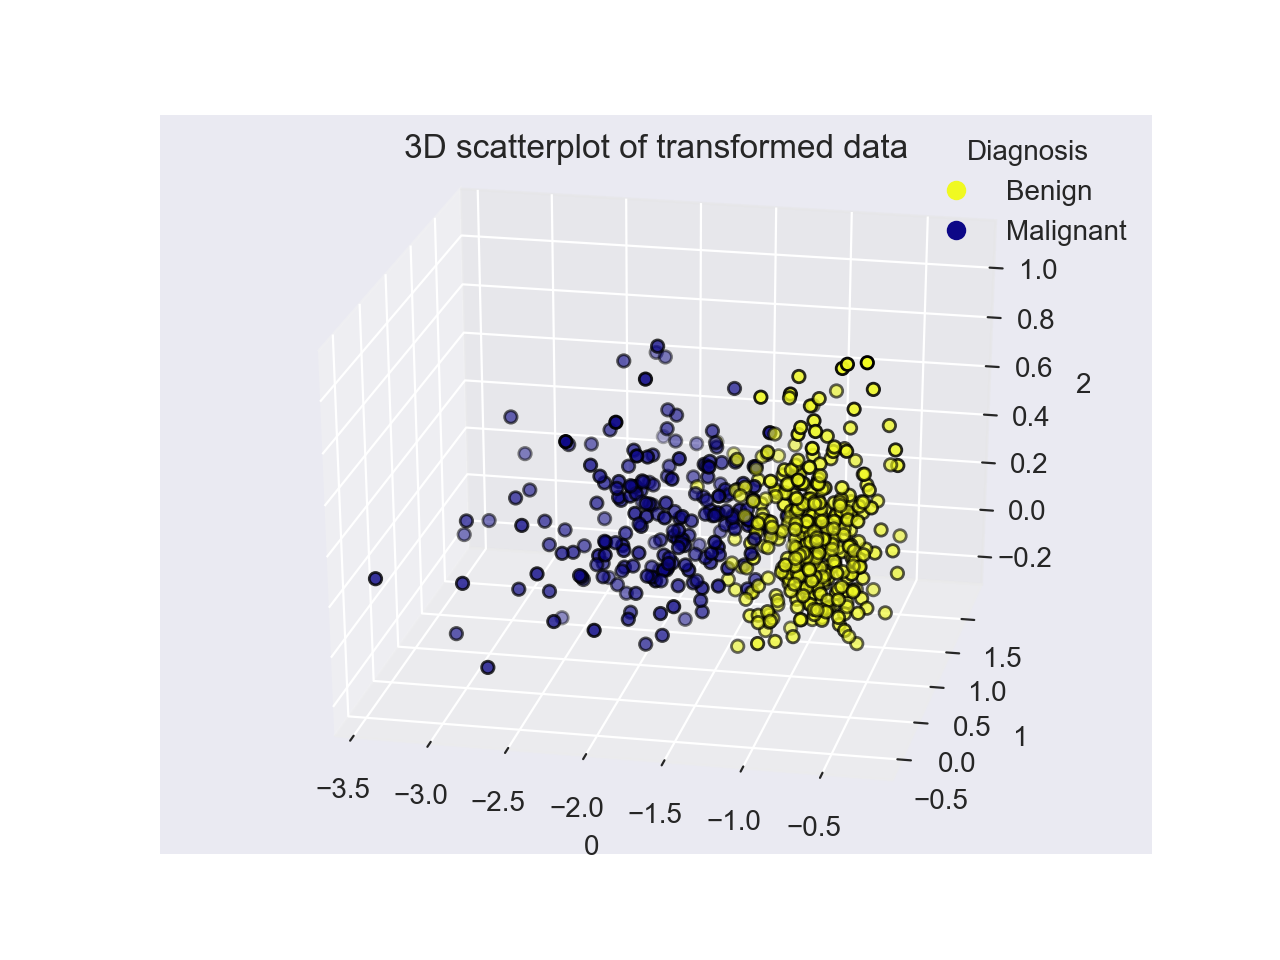

Expected Transformed data:
      0         1         2
0 -2.590770  0.762974 -0.223113
1 -1.666057 -0.220868  0.113415
2 -2.158371  0.226378  0.170741
3 -2.204565  1.861168  0.265319
4 -1.830577  0.033608 -0.090746


In [9]:
t2 = cancer_x @ v[:, :3]
print(t2.head(5))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t2[0], t2[1], t2[2], c=df['diagnosis'], cmap='plasma_r', edgecolors='black')
ax.set_title('3D scatterplot of transformed data')
ax.set_xlabel('0')
ax.set_ylabel('1')
ax.set_zlabel('2')

handles, labels = scatter.legend_elements(prop='colors')
labels = ['Benign', 'Malignant']
legend1 = ax.legend(handles, labels, loc="upper right", title="Diagnosis")

plt.show()

print('''Expected Transformed data:
      0         1         2
0 -2.590770  0.762974 -0.223113
1 -1.666057 -0.220868  0.113415
2 -2.158371  0.226378  0.170741
3 -2.204565  1.861168  0.265319
4 -1.830577  0.033608 -0.090746''')